# WORD2VEC

In word2vec there are 2 architectures CBOW(Continuous Bag of Words) and Skip Gram.

First thing to do is to collect word co-occurrence data. We need set of data telling us which words are occurring close to certain word. We will use something called as context window for doing this.

Consider, “Deep Learning is very hard and fun”. We need to set something known as window size. Let’s say 2 in this case. What we do is iterate over all the words in the given data, which in this case is just one sentence, and then consider a window of word which surrounds it. Here since our window size is 2 we will consider 2 words behind the word and 2 words after the word, hence each word will get 4 words associated with it. We will do this for each and every word in the data and collect the word pairs.

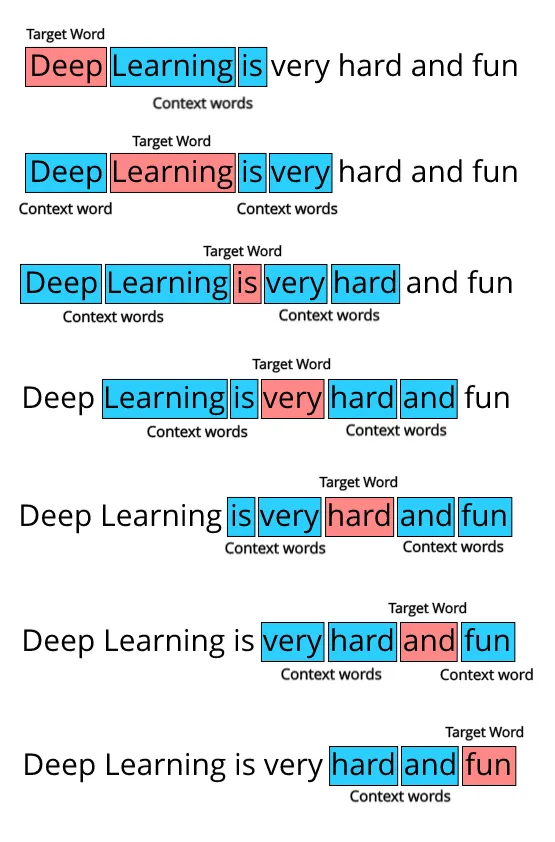

1st Window pairs: (Deep, Learning), (Deep, is)

2nd Window pairs: (Learning, Deep), (Learning, is), (Learning, very)

3rd Window pairs: (is, Deep), (is, Learning), (is, very), (is, hard)

(Deep, Learning), (Deep, is), (Learning, Deep), (Learning, is), (Learning, very), (is, Deep), (is, Learning), (is, very), (is, hard), (very, learning), (very, is), (very, hard), (very, and), (hard, is), (hard, very), (hard, and), (hard, fun), (and, very), (and, hard), (and, fun), (fun, hard), (fun, and)

This can be considered as our “training data” for word2vec.

## 1. CBOW

Continuous Bag of Words (CBOW) is a popular natural language processing technique used to generate word embeddings. Word embeddings are important for many NLP tasks because they capture semantic and syntactic relationships between words in a language. CBOW is a neural network-based algorithm that predicts a target word given its surrounding context words. It is a type of “unsupervised” learning, meaning that it can learn from unlabeled data, and it is often used to pre-train word embeddings that can be used for various NLP tasks such as sentiment analysis, text classification, and machine translation.

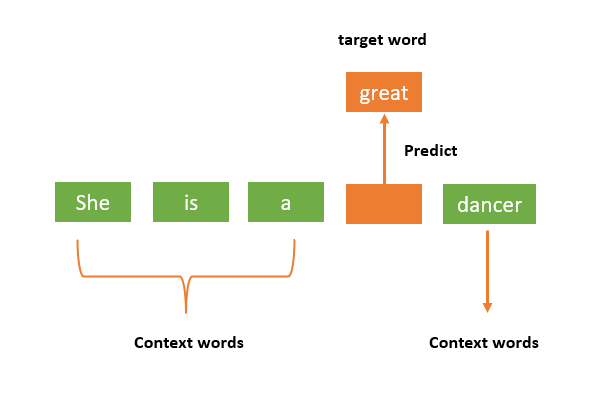

### Architecture of the CBOW model
The CBOW model uses the target word around the context word in order to predict it. Consider the above example “She is a great dancer.” The CBOW model converts this phrase into pairs of context words and target words. The word pairings would appear like this ([she, a], is), ([is, great], a) ([a, dancer], great) having window size=2.


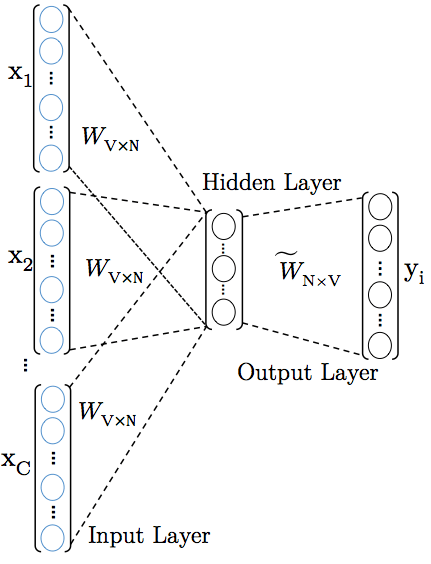

The model considers the context words and tries to predict the target term. The four 1∗W input vectors will be passed to the input layer if have four words as context words are used to predict one target word. The hidden layer will receive the input vectors and then multiply them by a W∗N matrix. The 1∗N output from the hidden layer finally enters the sum layer, where the vectors are element-wise summed before a final activation is carried out and the output is obtained from the output layer.

## 2. Skipgrams


We’ll do so by creating a “fake” task for the neural network to train. We won’t be interested in the inputs and outputs of this network, rather the goal is actually just to learn the weights of the hidden layer that are actually the “word vectors” that we’re trying to learn.

The fake task for Skip-gram model would be, given a word, we’ll try to predict its neighboring words. We’ll define a neighboring word by the window size — a hyper-parameter.

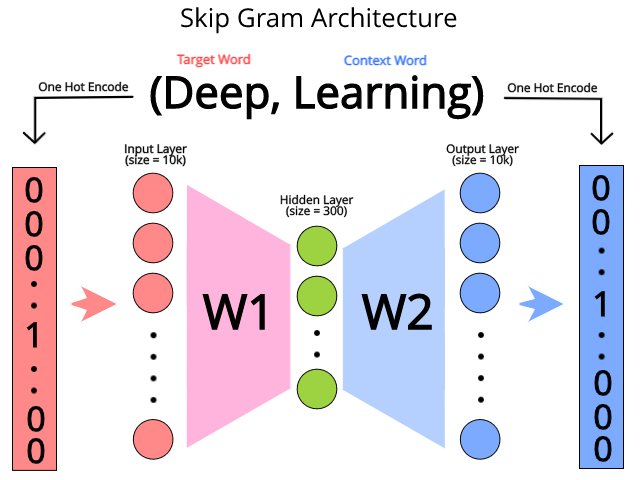

### SKIPGRAM VS CBOW ARCHITECTURE

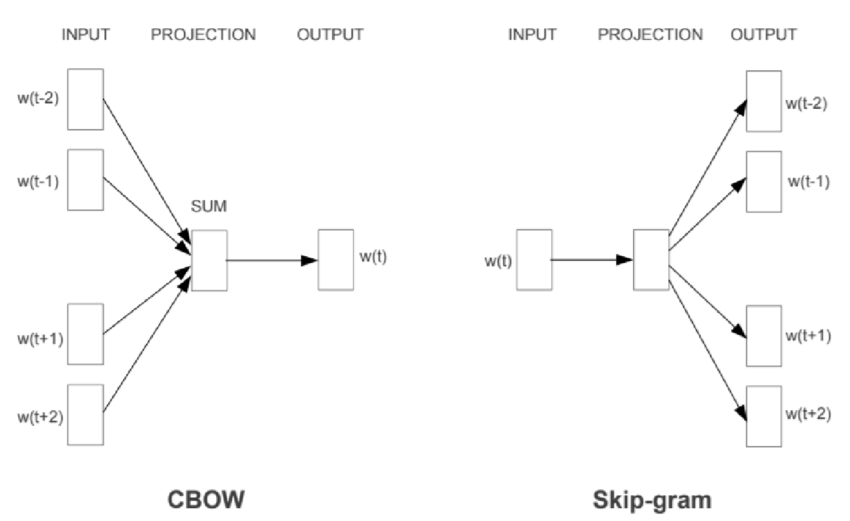

In [6]:
import pandas as pd
import nltk
import re
import gensim
from nltk import sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from gensim.utils import simple_preprocess

In [8]:
data = pd.read_csv("/content/windows_store.csv",on_bad_lines='skip')

In [9]:
data.head()

Name Price  \
0                WhatsApp Desktop  Free   
1                Telegram Desktop  Free   
2  Amazon Prime Video for Windows  Free   
3                       Instagram  Free   
4                   Spotify Music  Free   

                                         Description  \
0  With WhatsApp on the desktop, you can seamless...   
1  Pure instant messaging — simple, fast, secure,...   
2  Watch movies and TV shows recommended for you,...   
3  Bringing you closer to the people and things y...   
4  Love music? Play your favorite songs and album...   

                                Publisher Date of Release       Category  \
0                           WhatsApp Inc.      01-02-2017         Social   
1                  Telegram Messenger LLP      03-04-2017         Social   
2  Amazon Development Centre (London) Ltd      24-02-2020  Entertainment   
3                               Instagram      26-02-2016         Social   
4                              Spotify AB      26-05-2017          Music   

        Size          Age Rating  \
0  379.39 MB   For ages 3 and up   
1     103 MB  For ages 18 and up   
2   39.86 MB  For ages 12 and up   
3    4.59 MB  For ages 12 and up   
4  182.41 MB  For ages 12 and up   

                                           Languages  
0                              English(UnitedStates)  
1                              English(UnitedStates)  
2  English(UnitedStates)   English(UnitedKingdom)...  
3                              English(UnitedStates)  
4  English(UnitedStates)   العربية(المملكةالعربية...

In [10]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [11]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [12]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [13]:
corpus = []
lemmatizer = WordNetLemmatizer()
for i in range(0,len(data["Description"])):
  rew = re.sub("[^a-zA-Z]"," ",data["Description"][i])
  rew = rew.lower()
  rew = rew.split()
  rew = [lemmatizer.lemmatize(word) for word in rew if word not in stopwords.words("english")]
  rew = " ".join(rew)
  corpus.append(rew)

In [14]:
corpus

['whatsapp desktop seamlessly sync chat computer chat whatever device convenient',
 'pure instant messaging simple fast secure synced across device one world top downloaded apps million active user fast telegram fastest messaging app market connecting people via unique distributed network data center around globe synced access message phone tablet computer telegram apps standalone need keep phone connected start typing one device finish message another never lose data unlimited send medium file without limit type size entire chat history require disk space device securely stored telegram cloud long need secure made mission provide best security combined ease use everything telegram including chat group medium etc encrypted using combination bit symmetric aes encryption bit rsa encryption diffie hellman secure key exchange free open telegram fully documented free api developer open source apps verifiable build prove app download built exact source code published powerful create group ch

In [15]:
word = []
for sentence in corpus:
  sent_token = sent_tokenize(sentence)
  for sent in sent_token:
    word.append(simple_preprocess(sent))

In [16]:
word

[['whatsapp',
  'desktop',
  'seamlessly',
  'sync',
  'chat',
  'computer',
  'chat',
  'whatever',
  'device',
  'convenient'],
 ['pure',
  'instant',
  'messaging',
  'simple',
  'fast',
  'secure',
  'synced',
  'across',
  'device',
  'one',
  'world',
  'top',
  'downloaded',
  'apps',
  'million',
  'active',
  'user',
  'fast',
  'telegram',
  'fastest',
  'messaging',
  'app',
  'market',
  'connecting',
  'people',
  'via',
  'unique',
  'distributed',
  'network',
  'data',
  'center',
  'around',
  'globe',
  'synced',
  'access',
  'message',
  'phone',
  'tablet',
  'computer',
  'telegram',
  'apps',
  'standalone',
  'need',
  'keep',
  'phone',
  'connected',
  'start',
  'typing',
  'one',
  'device',
  'finish',
  'message',
  'another',
  'never',
  'lose',
  'data',
  'unlimited',
  'send',
  'medium',
  'file',
  'without',
  'limit',
  'type',
  'size',
  'entire',
  'chat',
  'history',
  'require',
  'disk',
  'space',
  'device',
  'securely',
  'stored',
  't

In [17]:
model = gensim.models.Word2Vec(word)

In [18]:
model.wv.index_to_key

['game',
 'video',
 'new',
 'play',
 'app',
 'world',
 'free',
 'file',
 'window',
 'feature',
 'use',
 'time',
 'player',
 'one',
 'get',
 'image',
 'com',
 'support',
 'make',
 'like',
 'mode',
 'best',
 'pdf',
 'photo',
 'http',
 'create',
 'experience',
 'also',
 'fun',
 'car',
 'level',
 'take',
 'device',
 'easy',
 'city',
 'real',
 'format',
 'different',
 'puzzle',
 'help',
 'audio',
 'find',
 'control',
 'way',
 'battle',
 'adventure',
 'friend',
 'enjoy',
 'download',
 'need',
 'skill',
 'using',
 'word',
 'tool',
 'music',
 'simulator',
 'screen',
 'www',
 'many',
 'color',
 'pc',
 'gameplay',
 'user',
 'choose',
 'online',
 'set',
 'challenge',
 'version',
 'save',
 'unique',
 'text',
 'microsoft',
 'full',
 'pro',
 'start',
 'note',
 'application',
 'want',
 'graphic',
 'enemy',
 'high',
 'simple',
 'add',
 'become',
 'card',
 'explore',
 'document',
 'open',
 'system',
 'driving',
 'available',
 'build',
 'design',
 'drive',
 'fast',
 'even',
 'every',
 'character',
 'wor

In [19]:
model.corpus_count

3960

In [20]:
model.epochs

5

In [21]:
model.wv.key_to_index

{'game': 0,
 'video': 1,
 'new': 2,
 'play': 3,
 'app': 4,
 'world': 5,
 'free': 6,
 'file': 7,
 'window': 8,
 'feature': 9,
 'use': 10,
 'time': 11,
 'player': 12,
 'one': 13,
 'get': 14,
 'image': 15,
 'com': 16,
 'support': 17,
 'make': 18,
 'like': 19,
 'mode': 20,
 'best': 21,
 'pdf': 22,
 'photo': 23,
 'http': 24,
 'create': 25,
 'experience': 26,
 'also': 27,
 'fun': 28,
 'car': 29,
 'level': 30,
 'take': 31,
 'device': 32,
 'easy': 33,
 'city': 34,
 'real': 35,
 'format': 36,
 'different': 37,
 'puzzle': 38,
 'help': 39,
 'audio': 40,
 'find': 41,
 'control': 42,
 'way': 43,
 'battle': 44,
 'adventure': 45,
 'friend': 46,
 'enjoy': 47,
 'download': 48,
 'need': 49,
 'skill': 50,
 'using': 51,
 'word': 52,
 'tool': 53,
 'music': 54,
 'simulator': 55,
 'screen': 56,
 'www': 57,
 'many': 58,
 'color': 59,
 'pc': 60,
 'gameplay': 61,
 'user': 62,
 'choose': 63,
 'online': 64,
 'set': 65,
 'challenge': 66,
 'version': 67,
 'save': 68,
 'unique': 69,
 'text': 70,
 'microsoft': 71,
 '

In [22]:
model.wv[0]

array([-1.6168646e+00,  6.1975706e-01,  2.4654588e-01,  1.2119076e+00,
       -3.5022154e-01, -5.7838094e-01, -2.5858153e-02,  1.7216584e-01,
       -1.0984660e+00,  6.4776766e-01, -1.0549953e-01, -9.9516934e-01,
       -4.1959199e-01,  2.1567973e-01, -1.1364955e+00, -8.1615978e-01,
        2.1517636e-01, -7.7329820e-01,  1.7881626e-01, -1.7855868e+00,
       -1.9575535e-01, -4.7602284e-01,  1.4338284e+00, -4.9390098e-01,
       -1.5029137e-01,  3.8466227e-01, -6.1615717e-01, -2.4903812e-01,
       -1.4121150e+00, -1.1706156e-01,  1.3800486e+00, -9.6902651e-01,
        1.0423884e+00,  1.0344841e+00, -1.0538718e+00,  2.3009358e-01,
        1.3942534e-01, -7.0375890e-02, -4.6022138e-01, -1.3676765e+00,
       -3.6641541e-01,  1.8951307e-01, -1.0509058e+00, -3.0428958e-01,
        4.0375754e-01,  3.0042988e-01, -7.4602240e-01, -5.1964617e-01,
       -8.6767077e-02, -1.8590513e-01,  4.2280559e-03,  2.6897224e-02,
       -5.9296101e-01, -7.9172122e-01, -9.3429172e-03, -1.1898903e+00,
      

In [23]:
model.wv.similar_by_word("taxi")

[('tuk', 0.9869019985198975),
 ('asphalt', 0.9858222007751465),
 ('racer', 0.9836257696151733),
 ('offroad', 0.9836244583129883),
 ('flying', 0.9819617867469788),
 ('bus', 0.9803518056869507),
 ('transporter', 0.9802196621894836),
 ('extreme', 0.9793163537979126),
 ('driving', 0.979225218296051),
 ('airplane', 0.979119062423706)]

#Avg WORD2VEC

AvgWord2Vec is an extension of Word2Vec that computes the word embeddings differently. Instead of learning context-based representations, AvgWord2Vec generates vectors by averaging the embeddings of constituent words in a sentence.

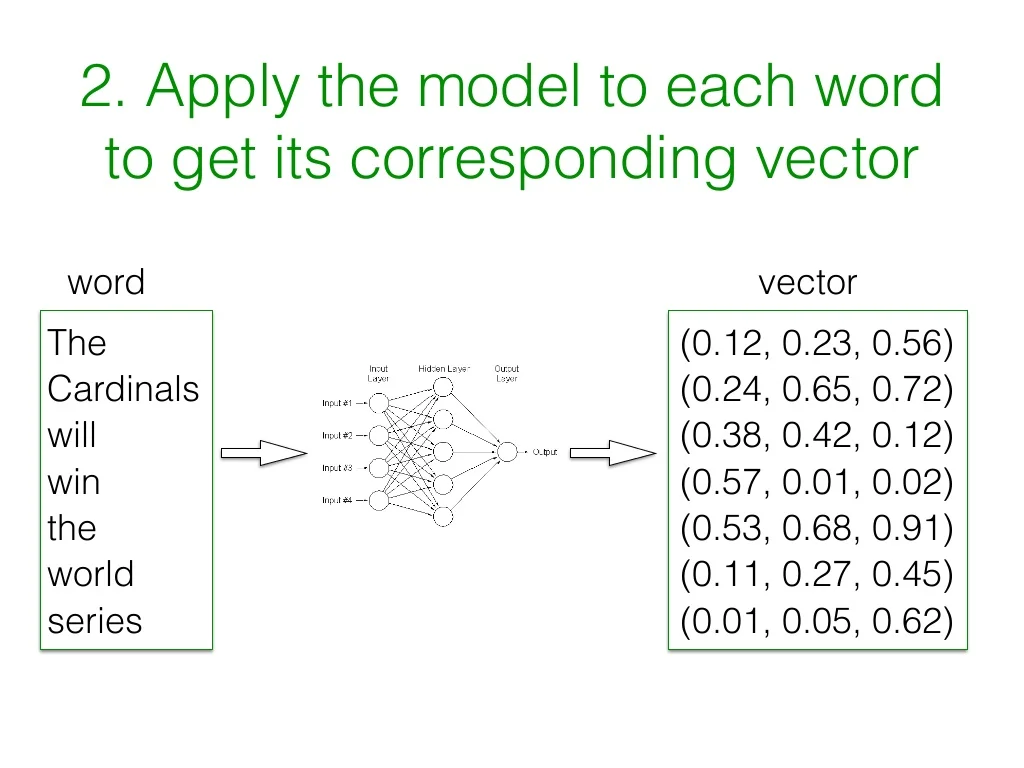

### implementations

In [24]:
import numpy as np
def avgWord2vec(doc):
  return np.mean([model.wv[word] for word in doc if word in model.wv.index_to_key],axis=0)

In [25]:
pip install tqdm

In [26]:
from tqdm import tqdm

In [27]:
word[73]

['microsoft',
 'app',
 'installer',
 'window',
 'make',
 'sideloading',
 'window',
 'apps',
 'easy',
 'double',
 'click',
 'app',
 'package',
 'run',
 'powershell',
 'install',
 'apps',
 'app',
 'installer',
 'present',
 'package',
 'information',
 'like',
 'app',
 'name',
 'publisher',
 'version',
 'display',
 'logo',
 'capability',
 'requested',
 'app',
 'get',
 'right',
 'app',
 'hassle',
 'installation',
 'work',
 'error',
 'message',
 'designed',
 'help',
 'fix',
 'problem',
 'window',
 'package',
 'manager',
 'supported',
 'app',
 'installer',
 'starting',
 'window',
 'application',
 'currently',
 'available',
 'desktop',
 'pc']

In [28]:
type(model.wv.index_to_key)

list

In [29]:
x = []
for i in tqdm(range(len(word))):
  x.append(avgWord2vec(word[i]))

100%|██████████| 3960/3960 [00:30<00:00, 129.47it/s]


In [31]:
x[0]

array([-0.78957796,  0.16847022,  0.434438  , -0.32004094, -0.23914988,
       -0.2823865 ,  0.13572864,  0.688249  , -0.25018764, -0.60930634,
        0.02292189, -0.5096772 , -0.593711  ,  0.04286545, -0.11171533,
        0.25326598, -0.20138136,  0.02574984,  0.17581907, -0.52854466,
       -0.56898445, -0.06946107, -0.0446477 ,  0.06285573, -0.5814692 ,
        0.34523454,  0.10947621, -0.36799288,  0.05116639, -0.17160581,
        0.89126223, -0.08916967, -0.00834668, -0.04288386,  0.18107657,
        0.07051131,  0.23416242, -0.53475606,  0.15267871, -0.5036002 ,
        0.06709028, -0.53588015, -0.09393783, -0.08729542,  0.35881278,
       -0.31106102, -0.3024487 , -0.45770448,  0.16490832,  0.22112486,
        0.32985994, -0.0954605 ,  0.32436606, -0.11476825,  0.40370172,
        0.5463859 ,  0.12767911, -0.17605238, -0.06845393,  0.00898694,
        0.15239587,  0.20077665, -0.11137182,  0.03224897, -0.29242596,
        0.05323251, -0.138654  ,  0.04187413, -0.03652692,  0.35